In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from pathlib import Path
from src.data import data_handle
from src.features.features import FraudFeatureEgineering
from src.models.fraud_mode import create_tuned_model
from src.utils import get_configuration
from src.utils import build_cut_table
from src.visualization import plots
import matplotlib.pyplot as plt 

plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = 39 
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 22   

plt.rcParams['xtick.labelsize'] = 18 
plt.rcParams['ytick.labelsize'] = 18 
plt.style.use('ggplot')

In [2]:
ROOT_DIR = Path.cwd().parents[0]
data_path = os.path.join(ROOT_DIR, 'data/raw/credit_card.parquet')

In [3]:
data = data_handle.load_data(data_path)

In [4]:
data_processor = FraudFeatureEgineering(data)
train_set, test_set = data_processor.get_fraud_features()

In [5]:
train_set

,credit_card_number,latitude,longitude,timestamp,merchant,V1,V2,V3,V4,V5,...,time_between_transactions,time_between_transactions_by_merchant,running_mean_Amount_by_merchant,running_std_Amount_by_merchant,is_anormal_amount,times_using_same_merchant,num_transactions_by_cc,distance_between_transactions,distance_between_transactions_by_merchant,transformed_merchant
0,676209430740,19.64745,-102.04897,0.0,store_1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,...,NaN,NaN,149.620000,NaN,0,1,7,0.000000,0.000000,1.953135
1,676209430740,37.95143,-91.77127,10.0,restaurant_1,1.191857,0.266151,0.166480,0.448154,0.060018,...,10.0,NaN,2.690000,NaN,0,1,7,2259.562748,0.000000,1.847570
2,676209430740,25.87972,-97.50417,70.0,fligh_tickets,-1.358354,-1.340163,1.773209,0.379780,-0.503198,...,60.0,NaN,378.660000,NaN,0,1,7,1443.403405,0.000000,-1.425918
3,676209430740,40.63316,-74.13653,100.0,gas_station_1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,...,30.0,NaN,123.500000,NaN,0,1,7,2708.962986,0.000000,3.180575
4,676209430740,16.75973,-93.11308,160.0,gas_station_2,-1.158233,0.877737,1.548718,0.403034,-0.407193,...,60.0,NaN,69.990000,NaN,0,1,7,3215.293211,0.000000,3.182571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,6011069227317400,41.6764,-91.58045,145244.0,restaurant_1,2.028950,-0.374089,-1.268051,0.349127,-0.057977,...,NaN,NaN,24.950000,NaN,0,1,4,0.000000,0.000000,1.847570
227841,6011069227317400,17.06542,-96.72365,145254.0,restaurant_1,0.306600,1.116021,-0.047348,3.593785,2.079047,...,10.0,10.0,12.855000,17.104913,0,2,4,2772.102186,2772.102186,1.847570
227842,6011069227317400,45.44868,-73.81669,145314.0,restaurant_2,-1.781954,2.062680,-3.758871,-1.801001,-0.084365,...,60.0,NaN,359.280000,NaN,0,1,4,3800.028192,0.000000,-0.293422
227843,6011069227317400,42.52787,-70.92866,145344.0,restaurant_1,-0.061507,1.024900,-0.170060,-0.263220,0.982164,...,30.0,90.0,21.703333,19.523525,0,3,4,398.687725,3735.687142,1.847570


In [6]:
train_path = os.path.join(ROOT_DIR, 'data/processed/train_set.parquet')
test_path = os.path.join(ROOT_DIR, 'data/processed/test_set.parquet')

data_handle.save_data(train_path, train_set)
data_handle.save_data(test_path, test_set)

In [8]:
plots.get_eda_html(file_name='raw_data_eda.html', data=data)

                                             |          | [  0%]   00:00 -> (? left)

Report /Users/kimalejandromoratrujillo/Documents/code/challenge_conekta/fraud_model/reports/raw_data_eda.html was generated.


In [9]:
plots.get_eda_html(file_name='train_set_eda.html', data=train_set)

                                             |          | [  0%]   00:00 -> (? left)

Report /Users/kimalejandromoratrujillo/Documents/code/challenge_conekta/fraud_model/reports/train_set_eda.html was generated.


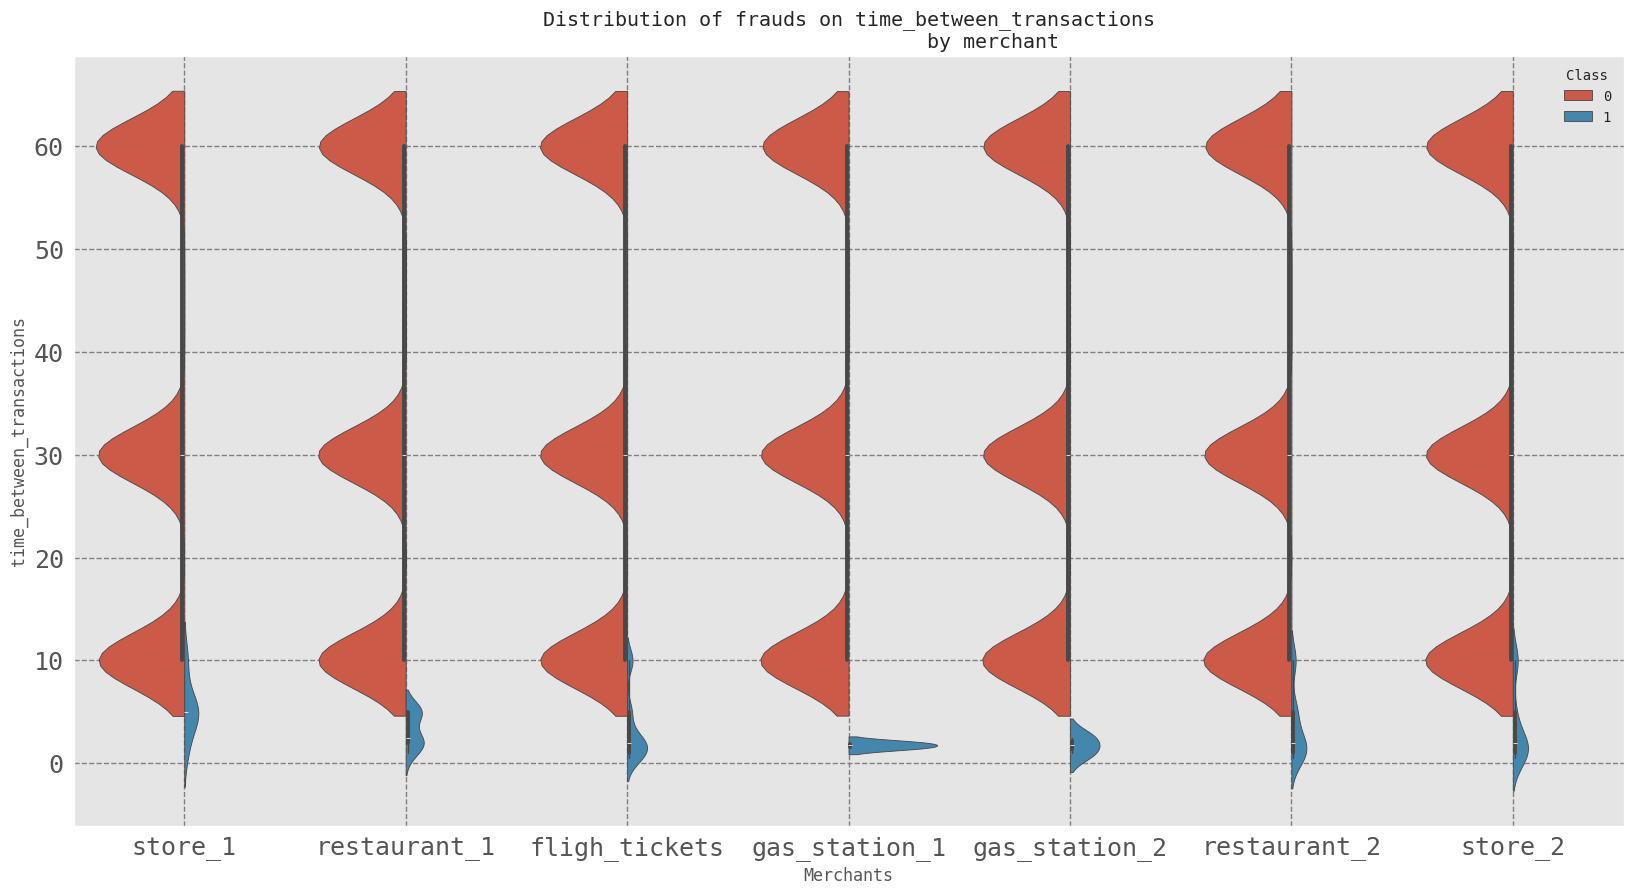

In [8]:
plots.create_violin_plots(data=train_set,comparison_col='time_between_transactions')

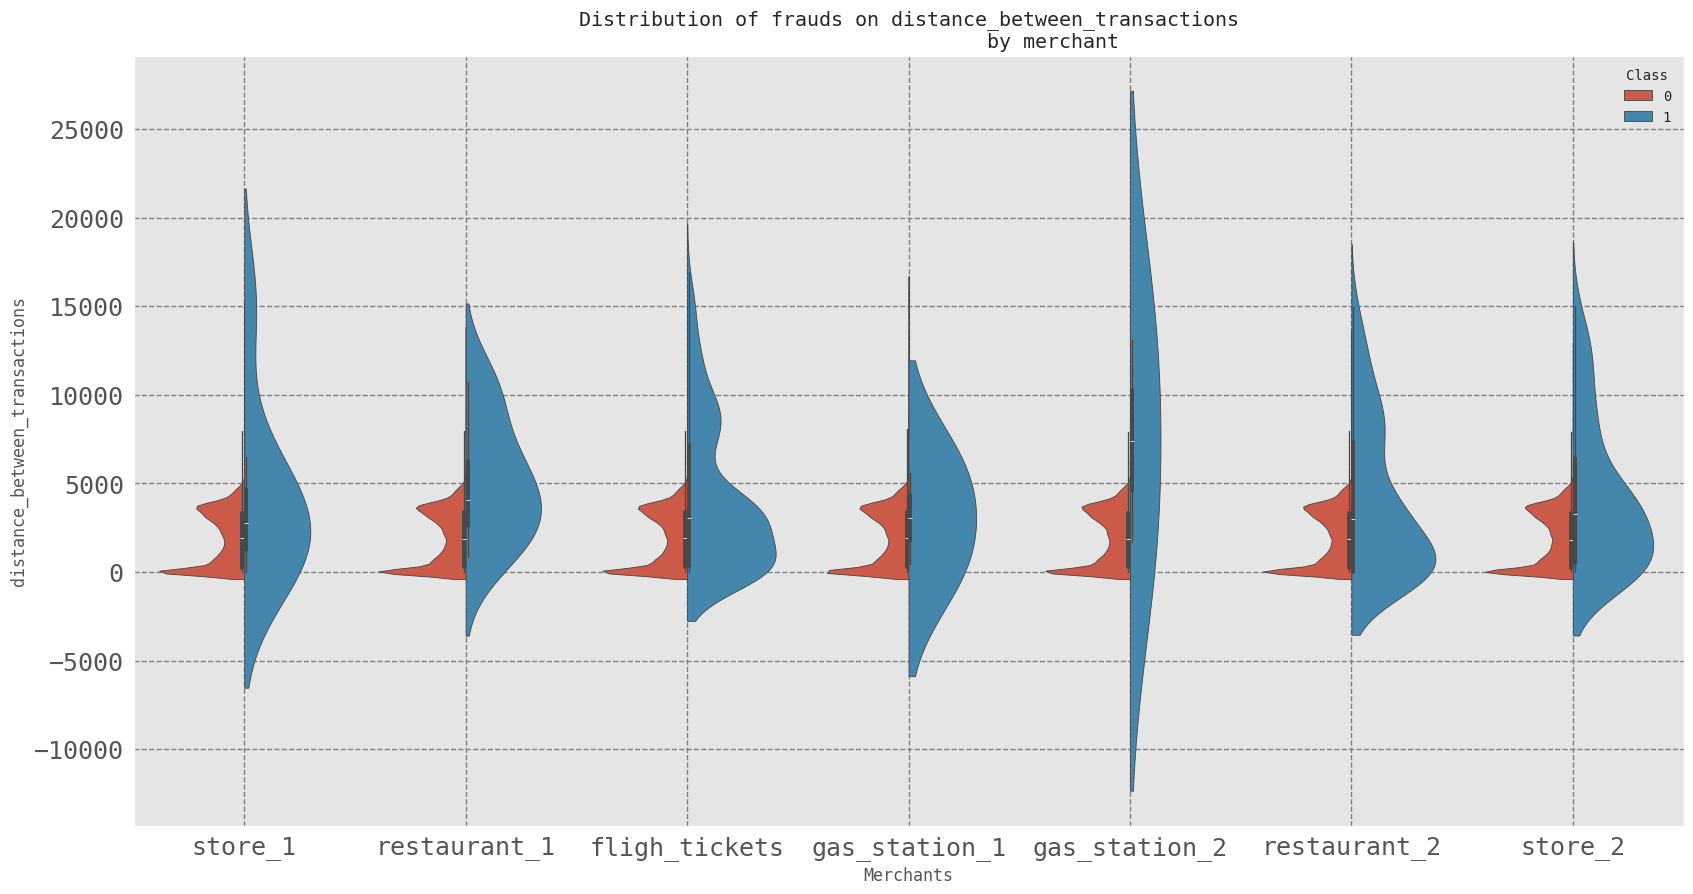

In [7]:
plots.create_violin_plots(data=train_set,comparison_col='distance_between_transactions')

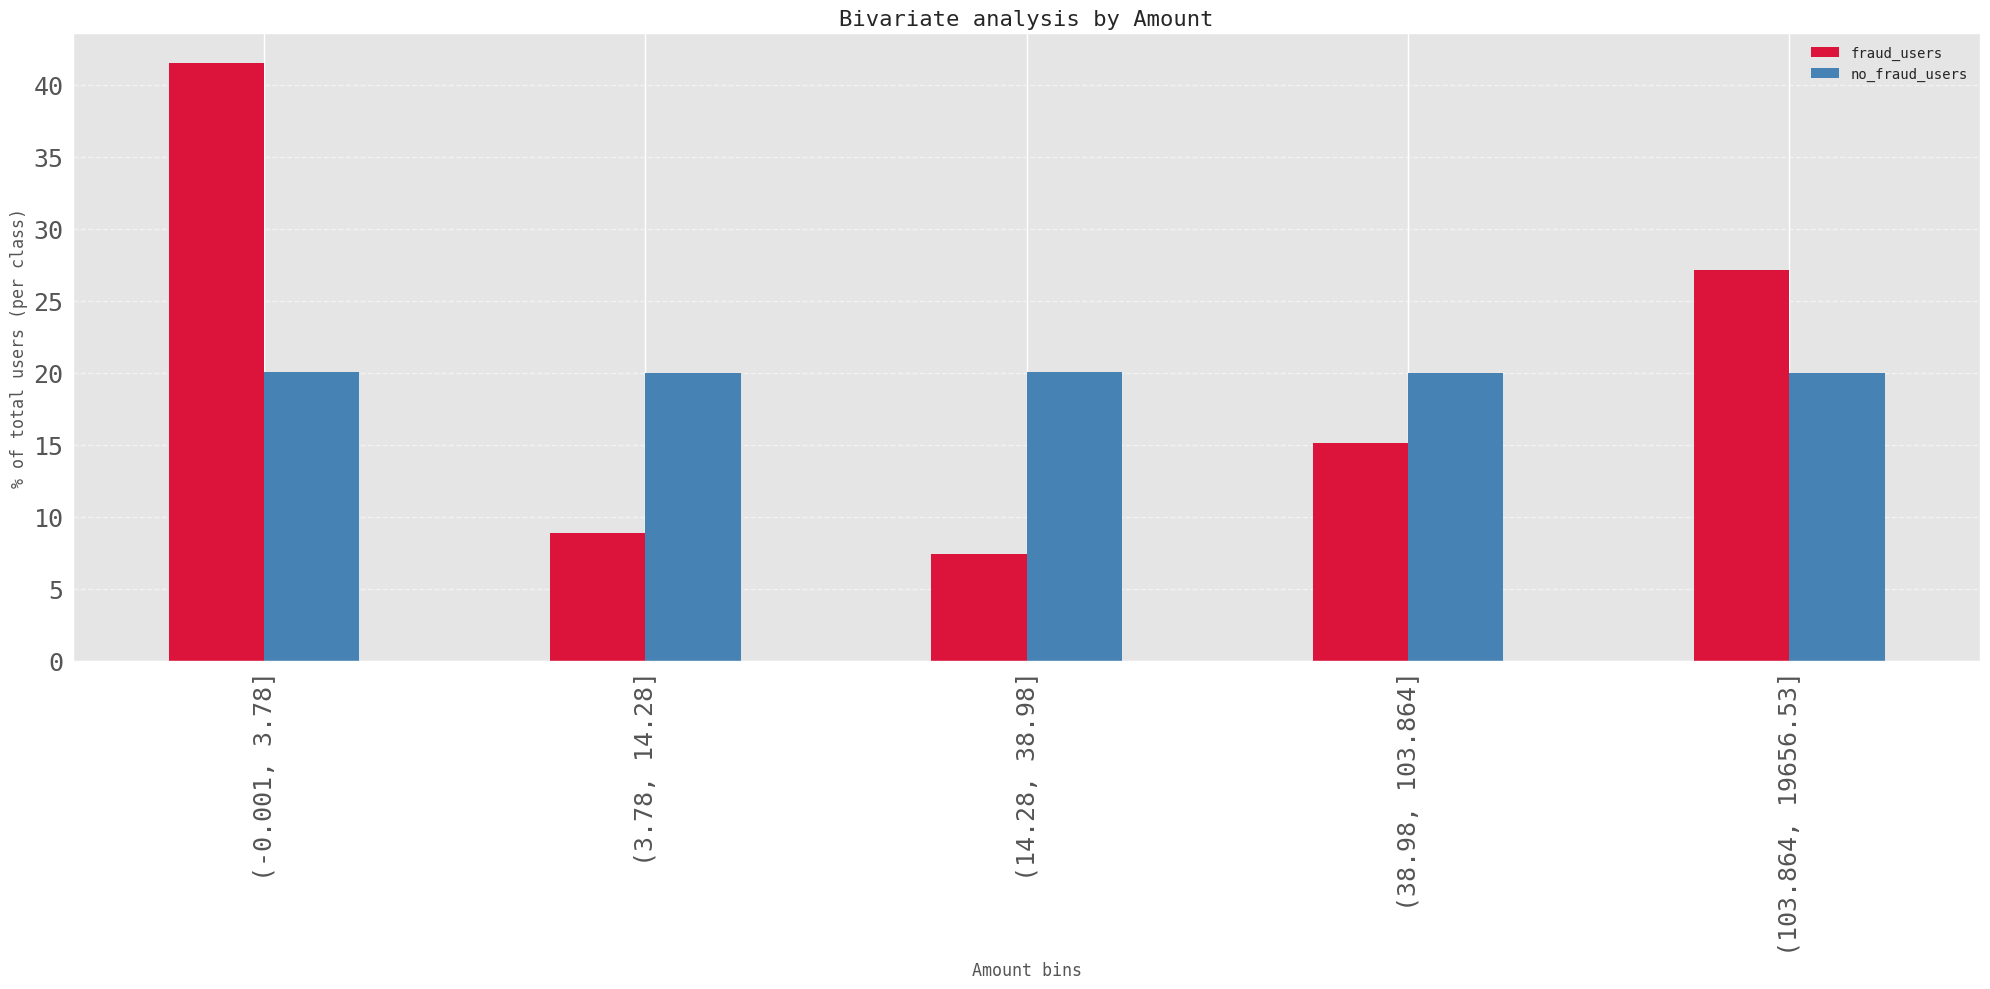

In [7]:
plots.create_bivariate_plots(train_set, 'Amount')

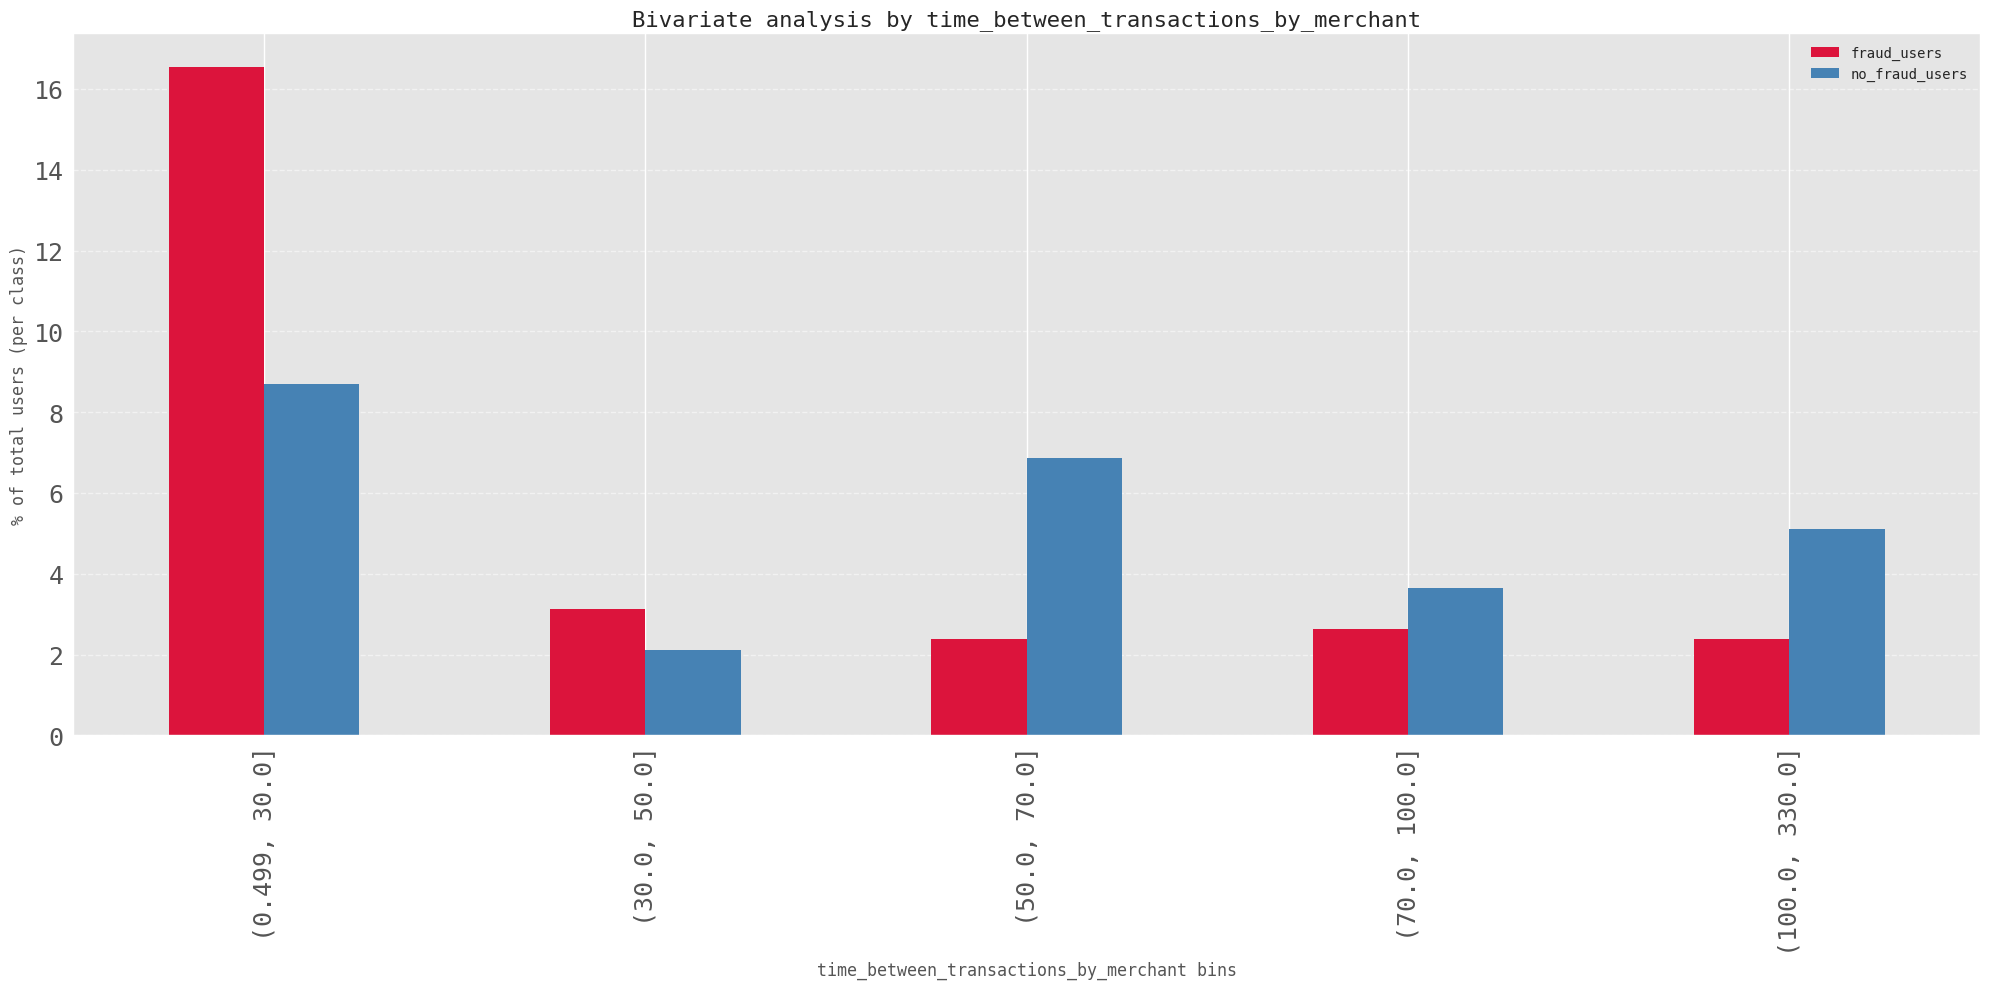

In [8]:
plots.create_bivariate_plots(train_set, 'time_between_transactions_by_merchant')

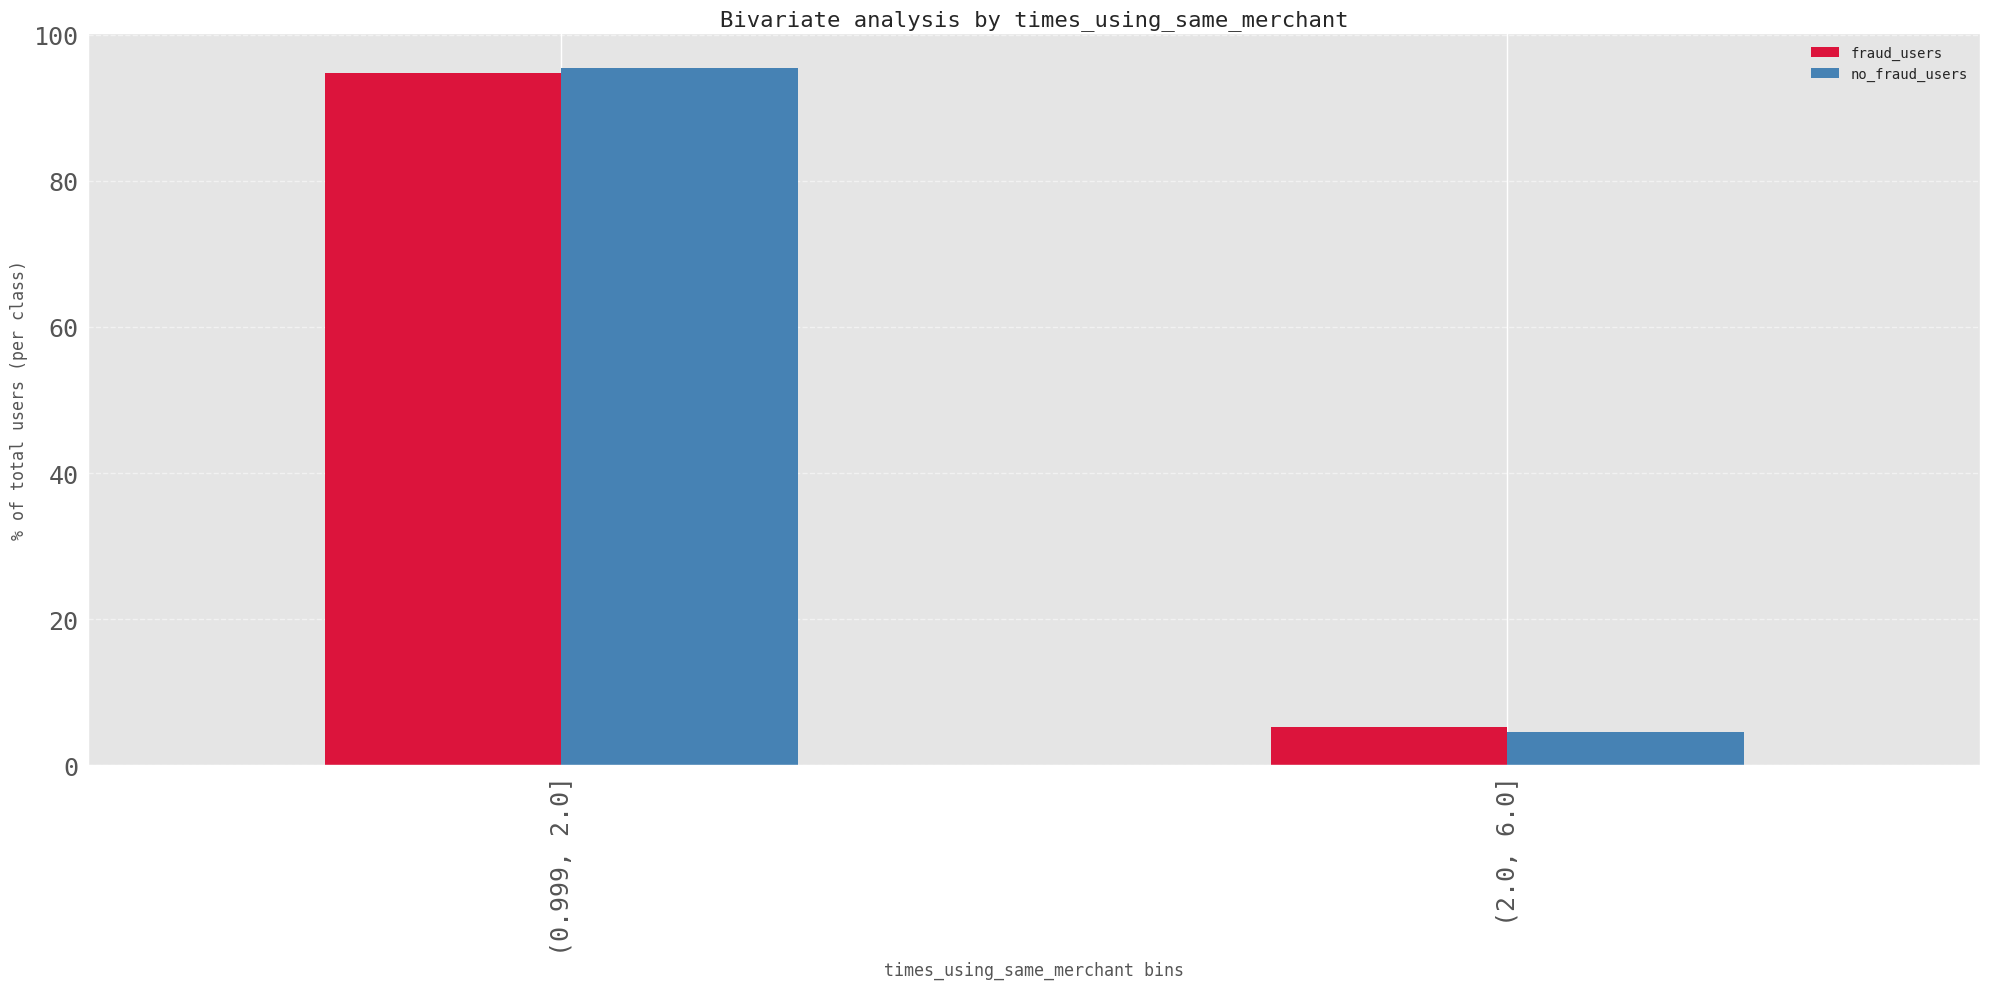

In [9]:
plots.create_bivariate_plots(train_set, 'times_using_same_merchant')

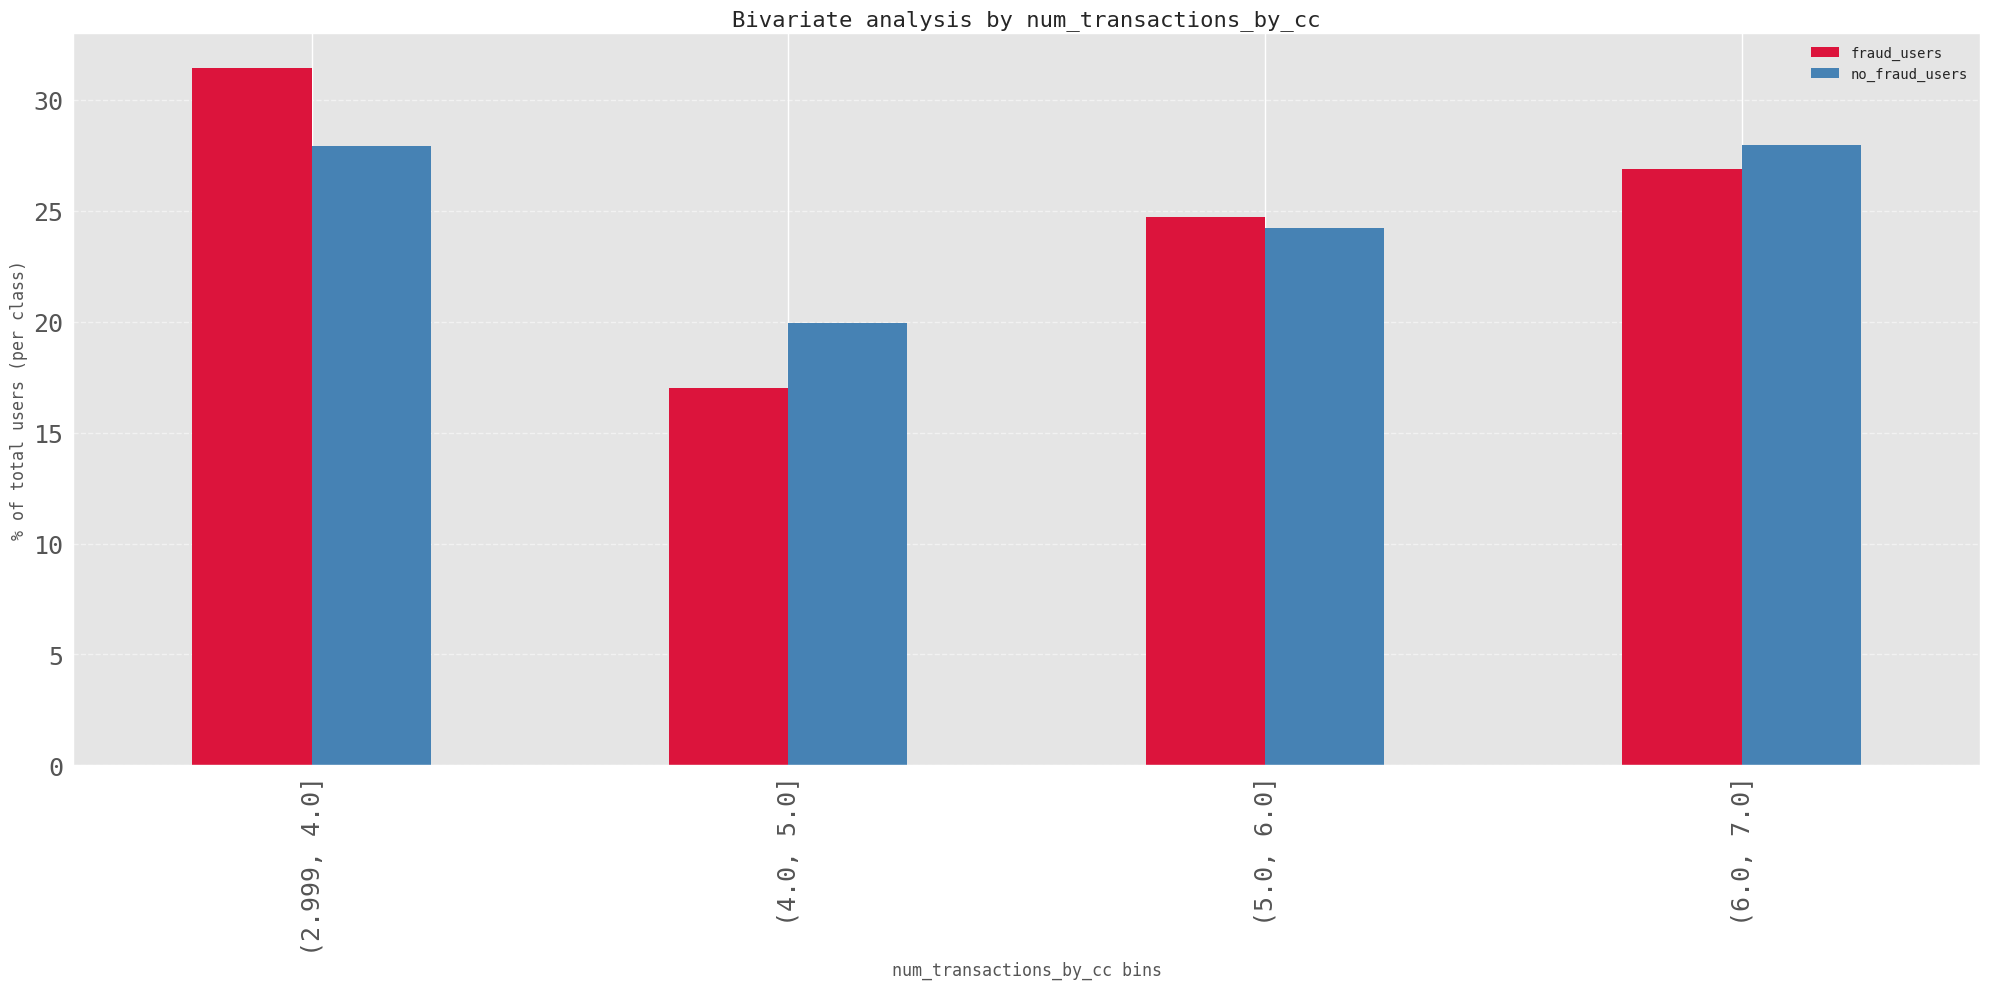

In [11]:
plots.create_bivariate_plots(train_set, 'num_transactions_by_cc')

In [8]:
CONFIG = get_configuration()

In [17]:
create_tuned_model(train_set=train_set,
                   model_type='lr')

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(227845, 40)"
4,Transformed data shape,"(386752, 40)"
5,Transformed train set shape,"(318398, 40)"
6,Transformed test set shape,"(68354, 40)"
7,Numeric features,39
8,Rows with missing values,73.5%
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9937,0.9956,0.9667,0.2248,0.3648,0.3628,0.4646
1,0.9927,0.9887,0.9655,0.1958,0.3256,0.3235,0.4331
2,0.9929,0.9977,0.9310,0.1957,0.3234,0.3213,0.4251
3,0.9937,0.9937,0.9310,0.2143,0.3484,0.3465,0.4450
4,0.9940,0.9971,0.8621,0.2137,0.3425,0.3405,0.4275
5,0.9931,0.9933,0.9655,0.2044,0.3373,0.3354,0.4426
6,0.9928,0.9938,0.8621,0.1838,0.3030,0.3009,0.3962
7,0.9925,0.9951,0.9655,0.1905,0.3182,0.3161,0.4271
8,0.9932,0.9897,0.8966,0.1970,0.3230,0.3210,0.4185


Transformation Pipeline and Model Successfully Saved


In [18]:
create_tuned_model(train_set=train_set,
                   model_type='catboost')

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(227845, 40)"
4,Transformed data shape,"(386752, 40)"
5,Transformed train set shape,"(318398, 40)"
6,Transformed test set shape,"(68354, 40)"
7,Numeric features,39
8,Rows with missing values,73.5%
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9997,0.9955,0.9333,0.9333,0.9333,0.9332,0.9332
1,0.9999,1.0000,0.9310,1.0000,0.9643,0.9642,0.9648
2,0.9996,0.9959,0.9310,0.8710,0.9000,0.8998,0.9003
3,0.9998,0.9994,0.9655,0.9333,0.9492,0.9491,0.9492
4,0.9996,0.9996,0.9310,0.8710,0.9000,0.8998,0.9003
5,0.9995,0.9936,0.9310,0.8182,0.8710,0.8707,0.8725
6,0.9996,0.9969,0.8966,0.8966,0.8966,0.8964,0.8964
7,0.9997,1.0000,1.0000,0.8788,0.9355,0.9354,0.9373
8,0.9994,0.9995,0.8966,0.8125,0.8525,0.8522,0.8532


Transformation Pipeline and Model Successfully Saved


In [19]:
create_tuned_model(train_set=train_set,
                   model_type='lightgbm')

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(227845, 40)"
4,Transformed data shape,"(386752, 40)"
5,Transformed train set shape,"(318398, 40)"
6,Transformed test set shape,"(68354, 40)"
7,Numeric features,39
8,Rows with missing values,73.5%
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9998,0.9937,0.9333,0.9655,0.9492,0.9491,0.9492
1,0.9998,0.9998,0.9655,0.9333,0.9492,0.9491,0.9492
2,0.9997,0.9951,0.9310,0.9310,0.9310,0.9309,0.9309
3,0.9998,0.9996,0.9655,0.9333,0.9492,0.9491,0.9492
4,0.9997,0.9922,0.9310,0.9000,0.9153,0.9151,0.9152
5,0.9996,0.9973,0.8966,0.8966,0.8966,0.8964,0.8964
6,0.9996,0.9612,0.8276,0.9600,0.8889,0.8887,0.8912
7,0.9997,1.0000,0.9655,0.9032,0.9333,0.9332,0.9337
8,0.9998,0.9962,0.9655,0.9333,0.9492,0.9491,0.9492


Transformation Pipeline and Model Successfully Saved


In [20]:
create_tuned_model(train_set=train_set,
                   model_type='xgboost')

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(227845, 40)"
4,Transformed data shape,"(386752, 40)"
5,Transformed train set shape,"(318398, 40)"
6,Transformed test set shape,"(68354, 40)"
7,Numeric features,39
8,Rows with missing values,73.5%
9,Preprocess,True


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9998,0.9866,0.9333,0.9655,0.9492,0.9491,0.9492
1,0.9997,1.0000,0.9655,0.9032,0.9333,0.9332,0.9337
2,0.9997,0.9968,0.9310,0.9310,0.9310,0.9309,0.9309
3,0.9999,0.9995,0.9655,0.9655,0.9655,0.9655,0.9655
4,0.9997,0.9974,0.9310,0.9310,0.9310,0.9309,0.9309
5,0.9997,0.9847,0.8966,0.9286,0.9123,0.9121,0.9123
6,0.9997,0.9865,0.8966,0.9630,0.9286,0.9284,0.9290
7,0.9998,1.0000,1.0000,0.9062,0.9508,0.9507,0.9519
8,0.9997,0.9986,0.9655,0.9032,0.9333,0.9332,0.9337


Transformation Pipeline and Model Successfully Saved


In [21]:
lr_model = load_model('lr')
xgb_model = load_model('xgboost')
cat_model = load_model('catboost')
lgbm_model = load_model('lightgbm')

Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded
Transformation Pipeline and Model Successfully Loaded


In [22]:
models_dict = {'logistic_regression': lr_model,
               'xgboost': xgb_model,
               'catboost': cat_model,
               'lightgbm': lgbm_model}

In [9]:
X_test = test_set.drop(['Class', 'timestamp', 'credit_card_number', 'latitude',
                        'longitude', 'merchant'],
                       axis=1)
y_test = test_set['Class']

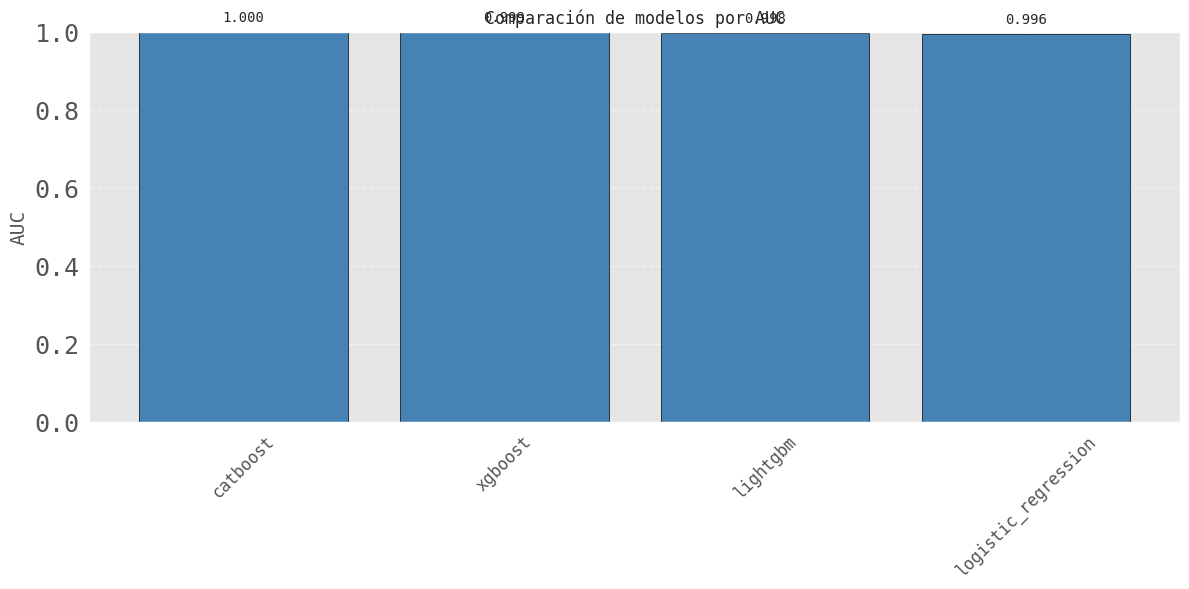

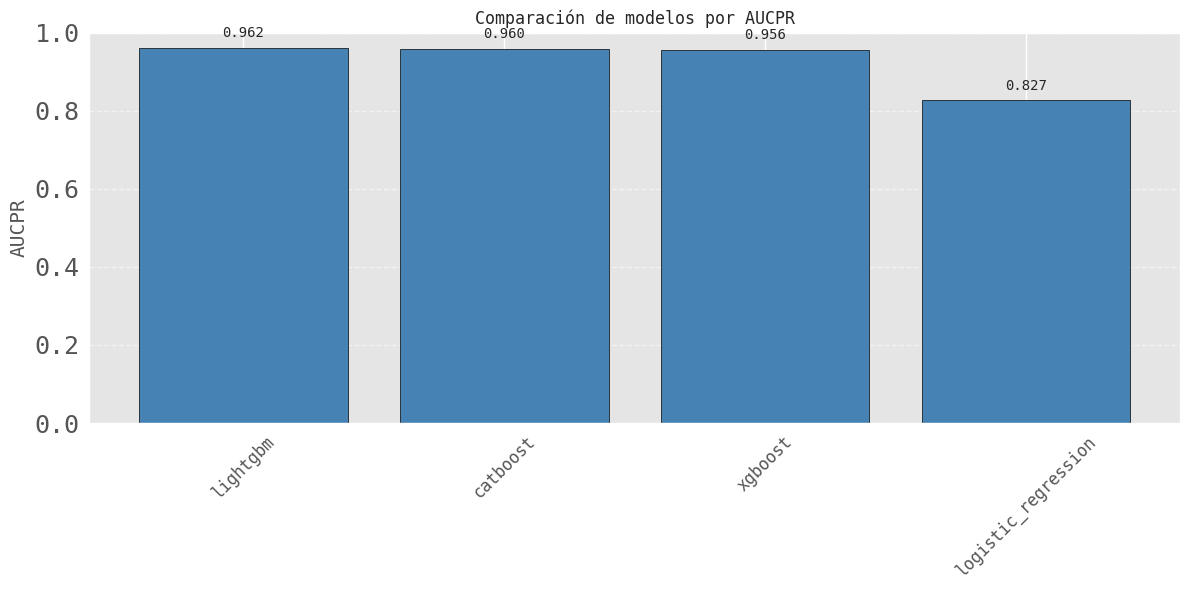

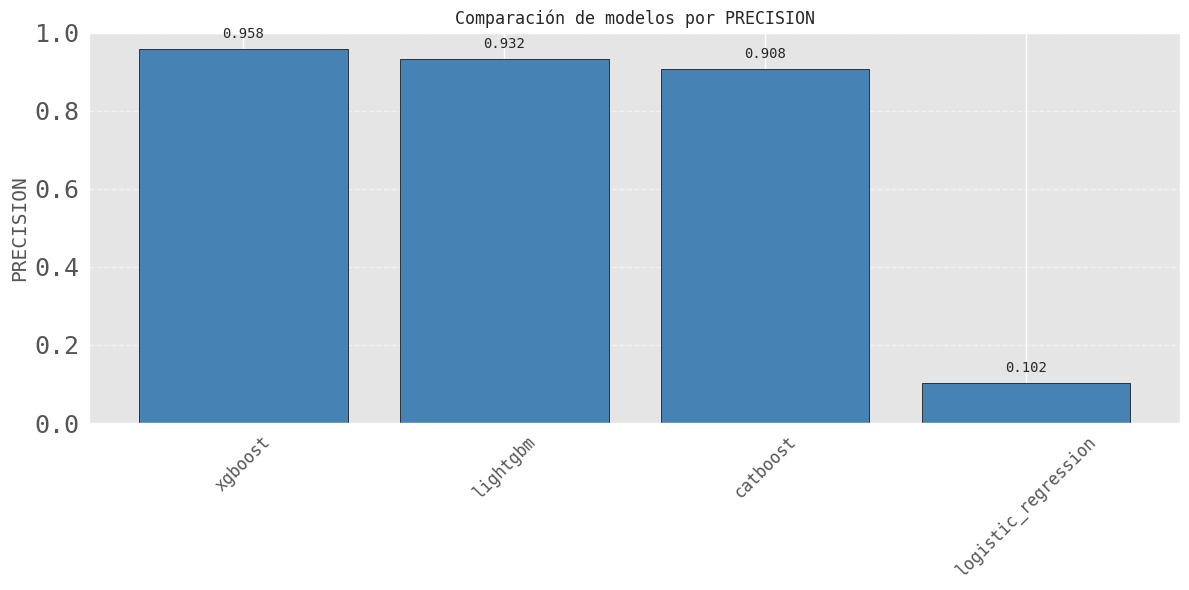

In [25]:
plots.create_comparison_metrics_report(models_dict,
                                         X_test, y_test)

In [10]:
clf_setup = setup(
    data=train_set.drop(CONFIG['model']['drop_features'], axis=1),
    target=CONFIG['model']['target'],              
    session_id=123,
    numeric_imputation=False, 
    normalize=True,                
    fix_imbalance=True,
    fix_imbalance_method=CONFIG['model']['balance_class_type'],
    )

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(227845, 40)"
4,Transformed data shape,"(386752, 40)"
5,Transformed train set shape,"(318398, 40)"
6,Transformed test set shape,"(68354, 40)"
7,Numeric features,39
8,Rows with missing values,73.5%
9,Preprocess,True


In [11]:
best_model = compare_models(['lr', 'xgboost', 'catboost', 'lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9998,0.9971,0.9348,0.9422,0.9379,0.9378,0.9381,0.7130
lightgbm,Light Gradient Boosting Machine,0.9998,0.9981,0.9314,0.9429,0.9362,0.9361,0.9366,0.8850
catboost,CatBoost Classifier,0.9997,0.9985,0.9313,0.8926,0.9111,0.9109,0.9113,6.9960
lr,Logistic Regression,0.9950,0.9976,0.9347,0.2593,0.4057,0.4040,0.4907,0.5650


In [12]:
results = pull()

In [13]:
import matplotlib.pyplot as plt

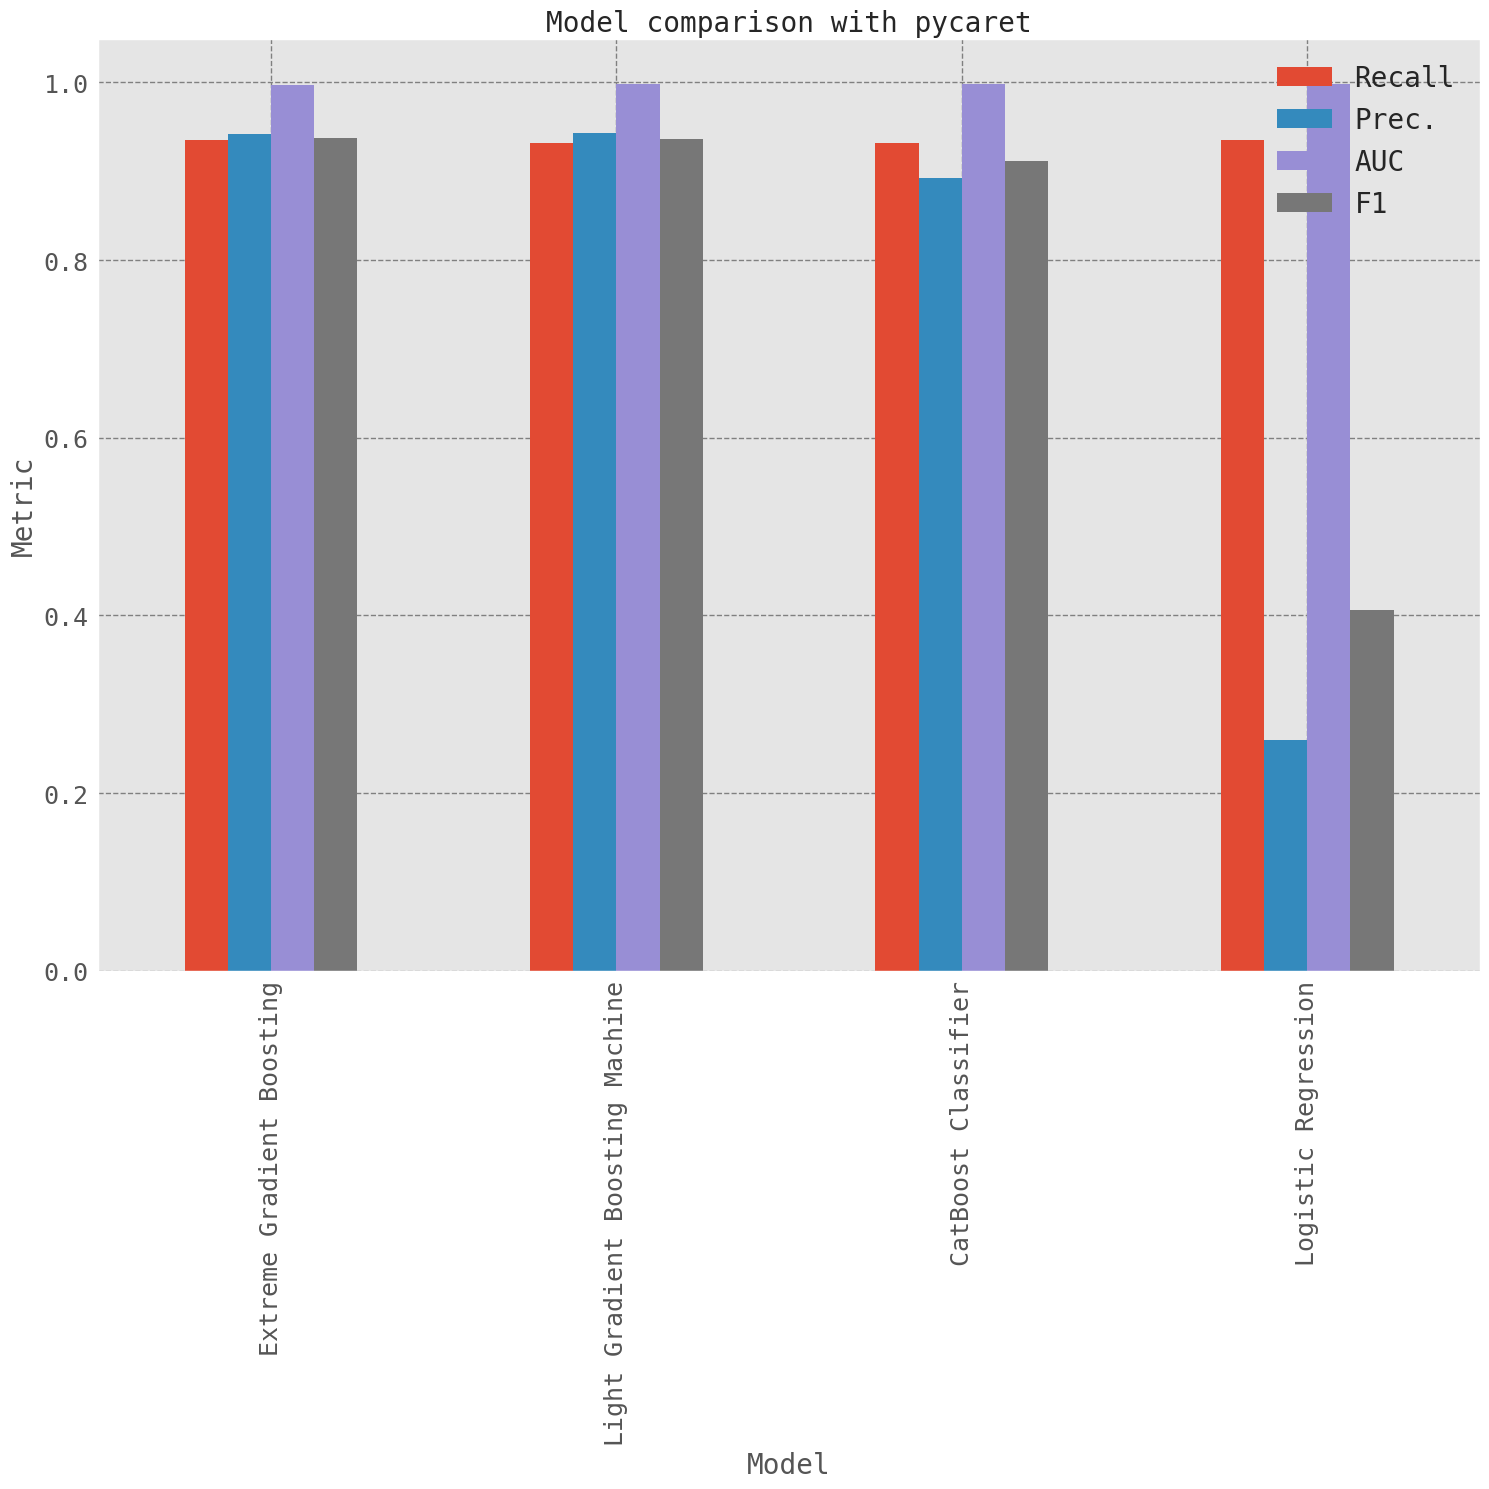

In [14]:
metrics = ['Model', 'Recall', 'Prec.', 'AUC', 'F1']
df_results = results[metrics].set_index('Model')

fig, ax= plt.subplots(figsize=(15,15))
df_results.plot(kind='bar', ax=ax)
ax.set_title('Model comparison with pycaret', fontsize=20)
ax.legend(fontsize=20)
ax.set_xlabel('Model', fontsize=20)
ax.set_ylabel('Metric', fontsize=20)
ax.grid(True, linestyle='--', c='gray')
fig.tight_layout()
fig.show()

In [15]:
optimimized_model = tune_model(best_model, optimize='Precision', n_iter=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9996,0.9955,0.9333,0.8485,0.8889,0.8887,0.8897
1,0.9997,1.0000,0.9655,0.9032,0.9333,0.9332,0.9337
2,0.9997,0.9988,0.9310,0.9000,0.9153,0.9151,0.9152
3,0.9999,0.9952,0.9655,0.9655,0.9655,0.9655,0.9655
4,0.9995,0.9991,0.8966,0.8387,0.8667,0.8664,0.8669
5,0.9996,0.9909,0.9310,0.8710,0.9000,0.8998,0.9003
6,0.9997,0.9774,0.8966,0.9630,0.9286,0.9284,0.9290
7,0.9997,1.0000,1.0000,0.8529,0.9206,0.9205,0.9234
8,0.9997,0.9994,0.9310,0.9000,0.9153,0.9151,0.9152


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [16]:
evaluate_model(optimimized_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
final_model = finalize_model(optimimized_model)

In [18]:
test_set['score'] = score_population(test_set, final_model)

In [19]:
cut_table = build_cut_table(test_set, bins=100)

In [25]:
cut_table.head()

,cut,acceptance_rate,number_of_fraud_accepted,number_of_fraud_rejected,accepted_fraud_rate,rejected_fraud_rate,chargeback_rate,amount_lossed,amount_saved
0,0.99,99.887644,12,63,0.021090,98.437500,0.000211,2456.27,5272.99
1,0.98,99.885889,11,64,0.019333,98.461538,0.000193,2455.27,5273.99
2,0.97,99.885889,11,64,0.019333,98.461538,0.000193,2455.27,5273.99
3,0.96,99.884133,10,65,0.017576,98.484848,0.000176,2454.27,5274.99
4,0.95,99.884133,10,65,0.017576,98.484848,0.000176,2454.27,5274.99


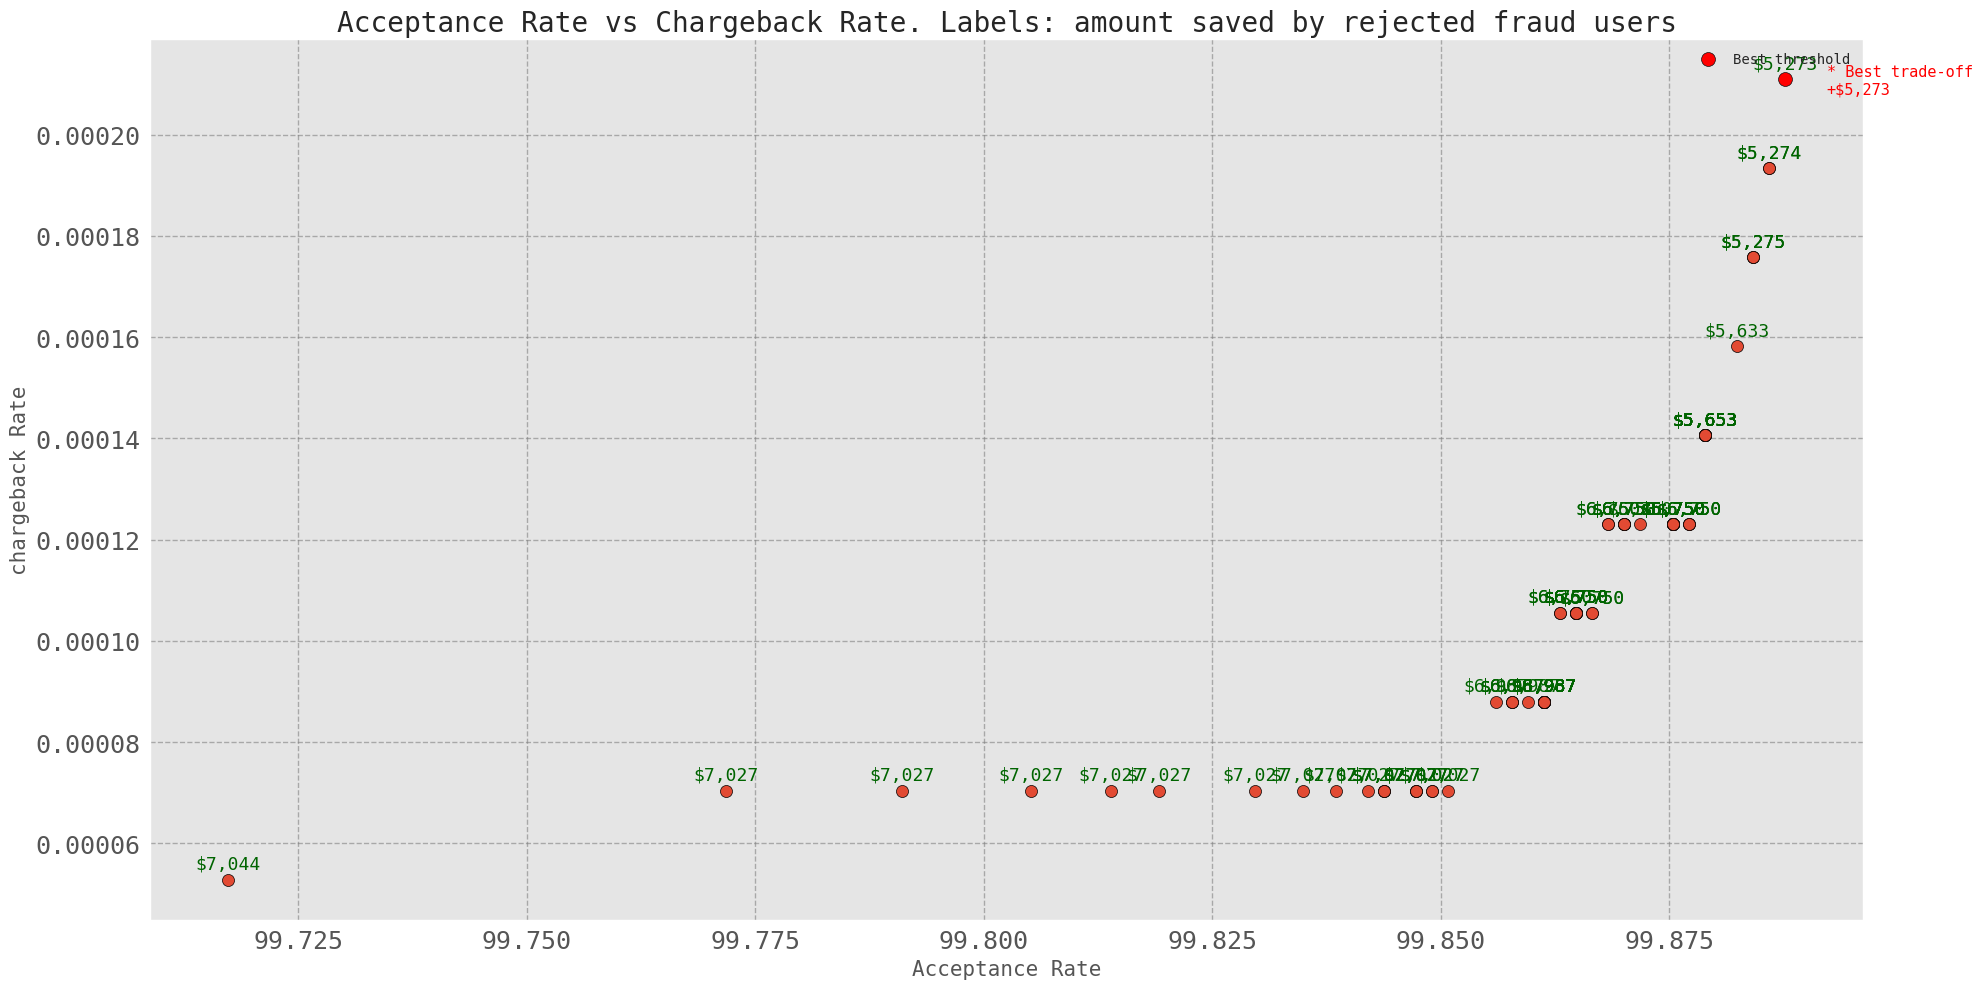

In [20]:
plots.create_acceptance_vs_chargeback_rate_plot(cut_table)

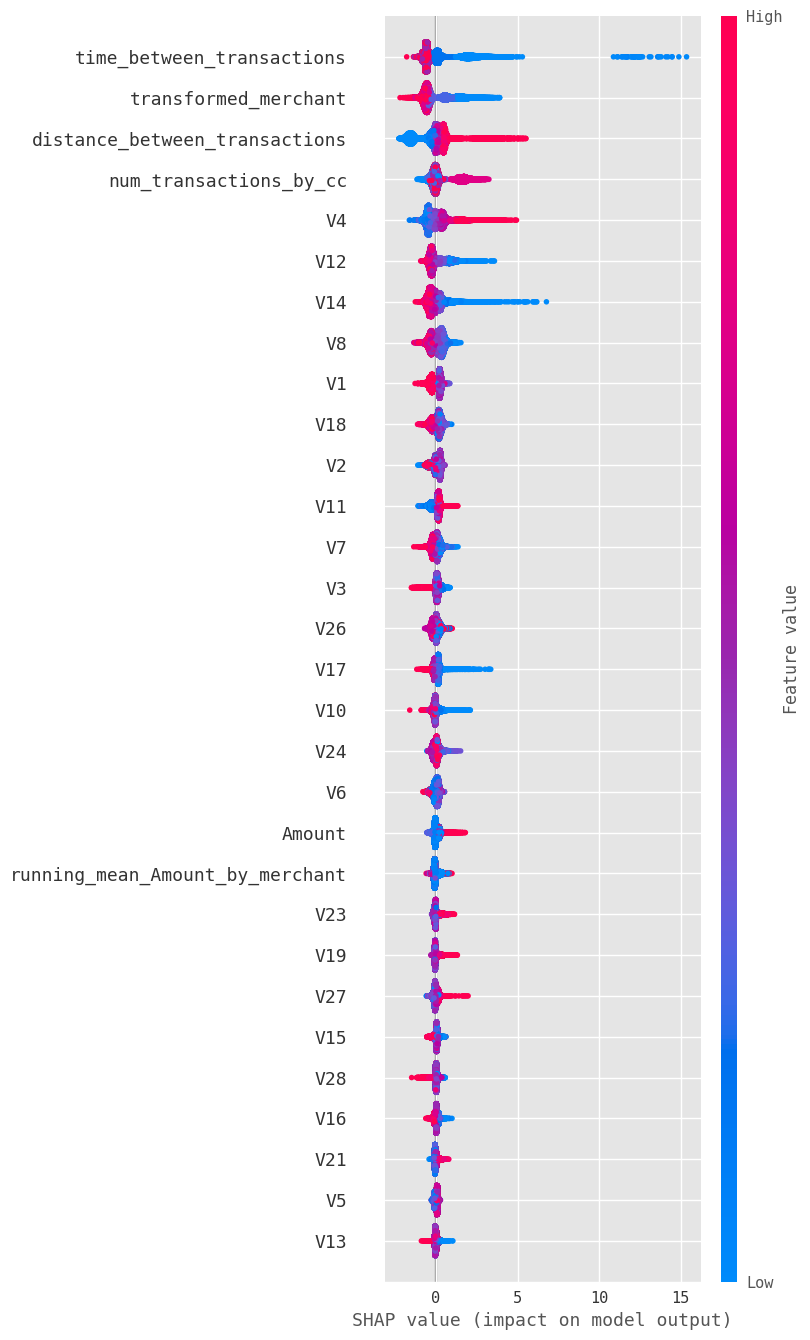

In [26]:
plots.create_shap_summary_plot(X_test, final_model)

In [27]:
save_model(final_model, 'faud_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['V1', 'V2', 'V3', 'V4', 'V5', 'V6',
                                              'V7', 'V8', 'V9', 'V10', 'V11',
                                              'V12', 'V13', 'V14', 'V15', 'V16',
                                              'V17', 'V18', 'V19', 'V20', 'V21',
                                              'V22', 'V23', 'V24', 'V25', 'V26',
                                              'V27', 'V28', 'Amount',
                                              'time_between_transactions', ...],
                                     transformer=SimpleImputer(add_indicator=Fa...
                                gamma=None, grow_policy=None,
                                importance_type=None,
                                interaction_constraints=None, learning_rate=None,
                                max

In [ ]:
create_api(final_model, 'fraud_scorer')

In [ ]:
create_docker()